# VirES - access to Østred, CHAMP, Cryosat-2, and Swarm virtual observatories data

This notebook demonstrates access to Østred, CHAMP, Cryosat-2 and Swarm VOBS_1M and VOBS_4M virtual observatory data via the VirES for Swarm API.

Avalable observed and core field data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | Swarm 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | Swarm 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | Swarm 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | Swarm 4 months data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_` | CHAMP 4 month data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:<code>` | CHAMP 4 months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_` | Cryosat-2 4 month data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:<code>` | Cryosat-2 4 months data from one selected virtual observatory |
| `OR_OPER_VOBS_4M_2_` | Østred 4 month data from all virtual observatories |
| `OR_OPER_VOBS_4M_2_:<code>` | Østred 4 months data from one selected virtual observatory |
| `CO_OPER_VOBS_4M_2_` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 month data from all virtual observatories |
| `CO_OPER_VOBS_4M_2_:<code>` | Ørsted, CHAMP, CryoSat-2 and Swarm composite  4 months data from one selected virtual observatory |

Avalable field secular variation data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_:SecularVariation` | Swarm 1 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:SecularVariation:<code>` | Swarm 1 month secular variation data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_:SecularVariation` | Swarm 4 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:SecularVariation:<code>` | Swarm 4 months secular variation data from one selected virtual observatory |
| `CH_OPER_VOBS_4M_2_:SecularVariation` | CHAMP 4 month secular variation data from all virtual observatories |
| `CH_OPER_VOBS_4M_2_:SecularVariation:<code>` | CHAMP 4 secular variation months data from one selected virtual observatory |
| `CR_OPER_VOBS_4M_2_:SecularVariation` | Cryosat-2 4 month secular variation data from all virtual observatories |
| `CR_OPER_VOBS_4M_2_:SecularVariation:<code>` | Cryosat-2 4 months secular variation data from one selected virtual observatory |
| `OR_OPER_VOBS_4M_2_:SecularVariation` | Østred 4 month secular variation data from all virtual observatories |
| `OR_OPER_VOBS_4M_2_:SecularVariation:<code>` | Østred 4 months secular variation data from one selected virtual observatory |
| `CO_OPER_VOBS_4M_2_:SecularVariation` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 month secular variation data from all virtual observatories |
| `CO_OPER_VOBS_4M_2_:SecularVariation:<code>` | Ørsted, CHAMP, CryoSat-2 and Swarm composite 4 months secular variation data from one selected virtual observatory |


The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable observed and core filed variables (same for all collections)

| Variable | Unit | Dimension | Description |
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

Avalable secular variation variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_SV` | $\text{nT}/\text{yr}$ | vector [3] | Field secular variation vector in ITRF NEC frame. |
| `sigma_SV` | $\text{nT}/\text{yr}$ | vector [3] | Estimated error of the field secular variation vector in ITRF NEC frame. |


In [1]:
from numpy import average
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

VOBS_VARIABLES = ['SiteCode', 'B_CF', 'B_OB', 'sigma_CF', 'sigma_OB']
VOBS_SV_VARIABLES = ['SiteCode', 'B_SV', 'sigma_SV']

EARTH_RADIUS = 6371000

server_url = None # default VirES server

request = SwarmRequest(server_url)       

## Swarm, CHAMP, and Cryosat-2 - VOBS_1M and VOBS_4M - one virtual observatory

In [2]:
from datetime import datetime

site = 'S77W114'

collections = {
    'SW_1M': 'SW_OPER_VOBS_1M_2_',
    'SW_4M': 'SW_OPER_VOBS_4M_2_',
    #'CH_1M': 'CH_OPER_VOBS_1M_2_',
    'CH_4M': 'CH_OPER_VOBS_4M_2_',
    'CR_4M': 'CR_OPER_VOBS_4M_2_',
    'OR_4M': 'OR_OPER_VOBS_4M_2_',
    'CO_4M': 'CO_OPER_VOBS_4M_2_',
}
data = {}
data_sv = {}

def download(collection, variables):
    print()
    print(collection)
    request.set_collection(collection)
    request.set_products(measurements=variables)
    return request.get_between(
        start_time='2000-01-01T10:00:00Z',
        end_time=datetime.now(),
        asynchronous=False,
    ).as_xarray()

for source, collection in collections.items():
    data[source] = download(f'{collection}:{site}', VOBS_VARIABLES)
    print(data[source])
    
    data_sv[source] = download(f'{collection}:SecularVariation:{site}', VOBS_SV_VARIABLES)
    print(data_sv[source])



SW_OPER_VOBS_1M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 85)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-12-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.019e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.018e+04
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... 2.34 5.181 7.487
    sigma_OB    (Timestamp, NEC) float64 17.46 21.85 7.305 ... 12.92 17.52 6.267
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20201215T000000_0104']
    

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 60)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-07-01T12:00:00 ... 2020-06-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 1.434 3.213 2.776 ... 1.434 3.213 2.776
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 15.17 -10.22 69.18 ... -1.678 75.18
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
Attributes:
    Sources:         ['SW_OPER_VOBS_1M_2__20131215T000000_20201215T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

SW_OPER_VOBS_4M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.018e+04
    sigma_CF    (Timestamp, NEC) float64 2.321 7.434 7.695 ... 2.321 7.434 7.695
    sigma_OB    (Timestamp, NEC) float64 13.37 14.66 5.103 ... 5.436 6.486 3.124
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0104']
    

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 18)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-09-15T12:00:00 ... 2020-05-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 1.747 6.805 3.786 ... 1.747 6.805 3.786
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 14.24 -10.2 67.58 ... -10.92 69.41
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CH_OPER_VOBS_4M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 30)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-11-01T12:00:00 ... 2010-07-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 nan nan nan ... 1.203e+04 -4.324e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.741e+06 6.741e+06
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.202e+04 -4.321e+04
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... 4.346 6.866 9.083
    sigma_OB    (Timestamp, NEC) float64 nan nan nan nan ... 6.64 8.28 4.859
Attributes:
    Sources:         ['CH_OPER_VOBS_4M_2__20001101T000000_20100701T000000_0104']
    M

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 27)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2001-05-15T12:00:00 ... 2010-01-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 nan nan nan nan ... 5.164 6.738 4.765
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 nan nan nan nan ... 14.86 -2.09 77.06
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.741e+06 6.741e+06 ... 6.741e+06 6.741e+06
Attributes:
    Sources:         ['CH_OPER_VOBS_4M_2__20001101T000000_20100701T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CR_OPER_VOBS_4M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 26)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2010-07-01T12:00:00 ... 2018-11-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 6.355e+03 9.76e+03 ... -3.636e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.098e+06 7.098e+06 ... 7.098e+06 7.098e+06
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 9.73e+03 -3.633e+04
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 5.653 ... 5.653 11.25 7.208
    sigma_OB    (Timestamp, NEC) float64 9.533 9.518 5.27 ... 18.54 27.64 9.464
Attributes:
    Sources:         ['CR_OPER_VOBS_4M_2__20100701T000000_20181101T000000_0104']
    

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 23)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2011-01-15T12:00:00 ... 2018-05-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 nan nan nan nan ... 5.353 nan nan nan
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 nan nan nan nan ... 56.84 nan nan nan
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.098e+06 7.098e+06 ... 7.098e+06 7.098e+06
Attributes:
    Sources:         ['CR_OPER_VOBS_4M_2__20100701T000000_20181101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

OR_OPER_VOBS_4M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 18)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-03-01T12:00:00 ... 2005-11-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 nan nan nan 6.207e+03 ... nan nan nan
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.126e+06 7.126e+06 ... 7.126e+06 7.126e+06
    B_CF        (Timestamp, NEC) float64 nan nan nan 6.214e+03 ... nan nan nan
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 4.705 ... 2.614 nan nan nan
    sigma_OB    (Timestamp, NEC) float64 nan nan nan 6.619 ... 4.368 nan nan nan
Attributes:
    Sources:         ['OR_OPER_VOBS_4M_2__19990301T000000_20051101T000000_0104

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 17)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-01-15T12:00:00 ... 2005-05-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 5.913 6.17 3.13 nan ... nan nan nan
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 8.785 -6.933 57.19 nan ... nan nan nan
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.126e+06 7.126e+06 ... 7.126e+06 7.126e+06
Attributes:
    Sources:         ['OR_OPER_VOBS_4M_2__19990301T000000_20051101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []

CO_OPER_VOBS_4M_2_:S77W114


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.089MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 63)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-03-01T12:00:00 ... 2020-11-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_OB        (Timestamp, NEC) float64 nan nan nan ... 9.855e+03 -3.666e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.071e+06 7.071e+06 ... 7.071e+06 7.071e+06
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 9.851e+03 -3.664e+04
    sigma_CF    (Timestamp, NEC) float64 nan nan nan 4.705 ... 2.321 7.434 7.695
    sigma_OB    (Timestamp, NEC) float64 nan nan nan 6.619 ... 5.436 6.486 3.124
Attributes:
    Sources:         ['CO_OPER_VOBS_4M_2__19990301T000000_20201101T000000_0104']

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.071MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 62)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2000-01-15T12:00:00 ... 2020-05-15...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    SiteCode    (Timestamp) <U7 'S77W114' 'S77W114' ... 'S77W114' 'S77W114'
    sigma_SV    (Timestamp, NEC) float64 5.913 6.17 3.13 ... 1.747 6.805 3.786
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_SV        (Timestamp, NEC) float64 9.167 -6.83 59.0 ... 14.91 -10.63 60.71
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 7.071e+06 7.071e+06 ... 7.071e+06 7.071e+06
Attributes:
    Sources:         ['CO_OPER_VOBS_4M_2__19990301T000000_20201101T000000_0104']
    MagneticModels:  []
    RangeFilters:    []


''

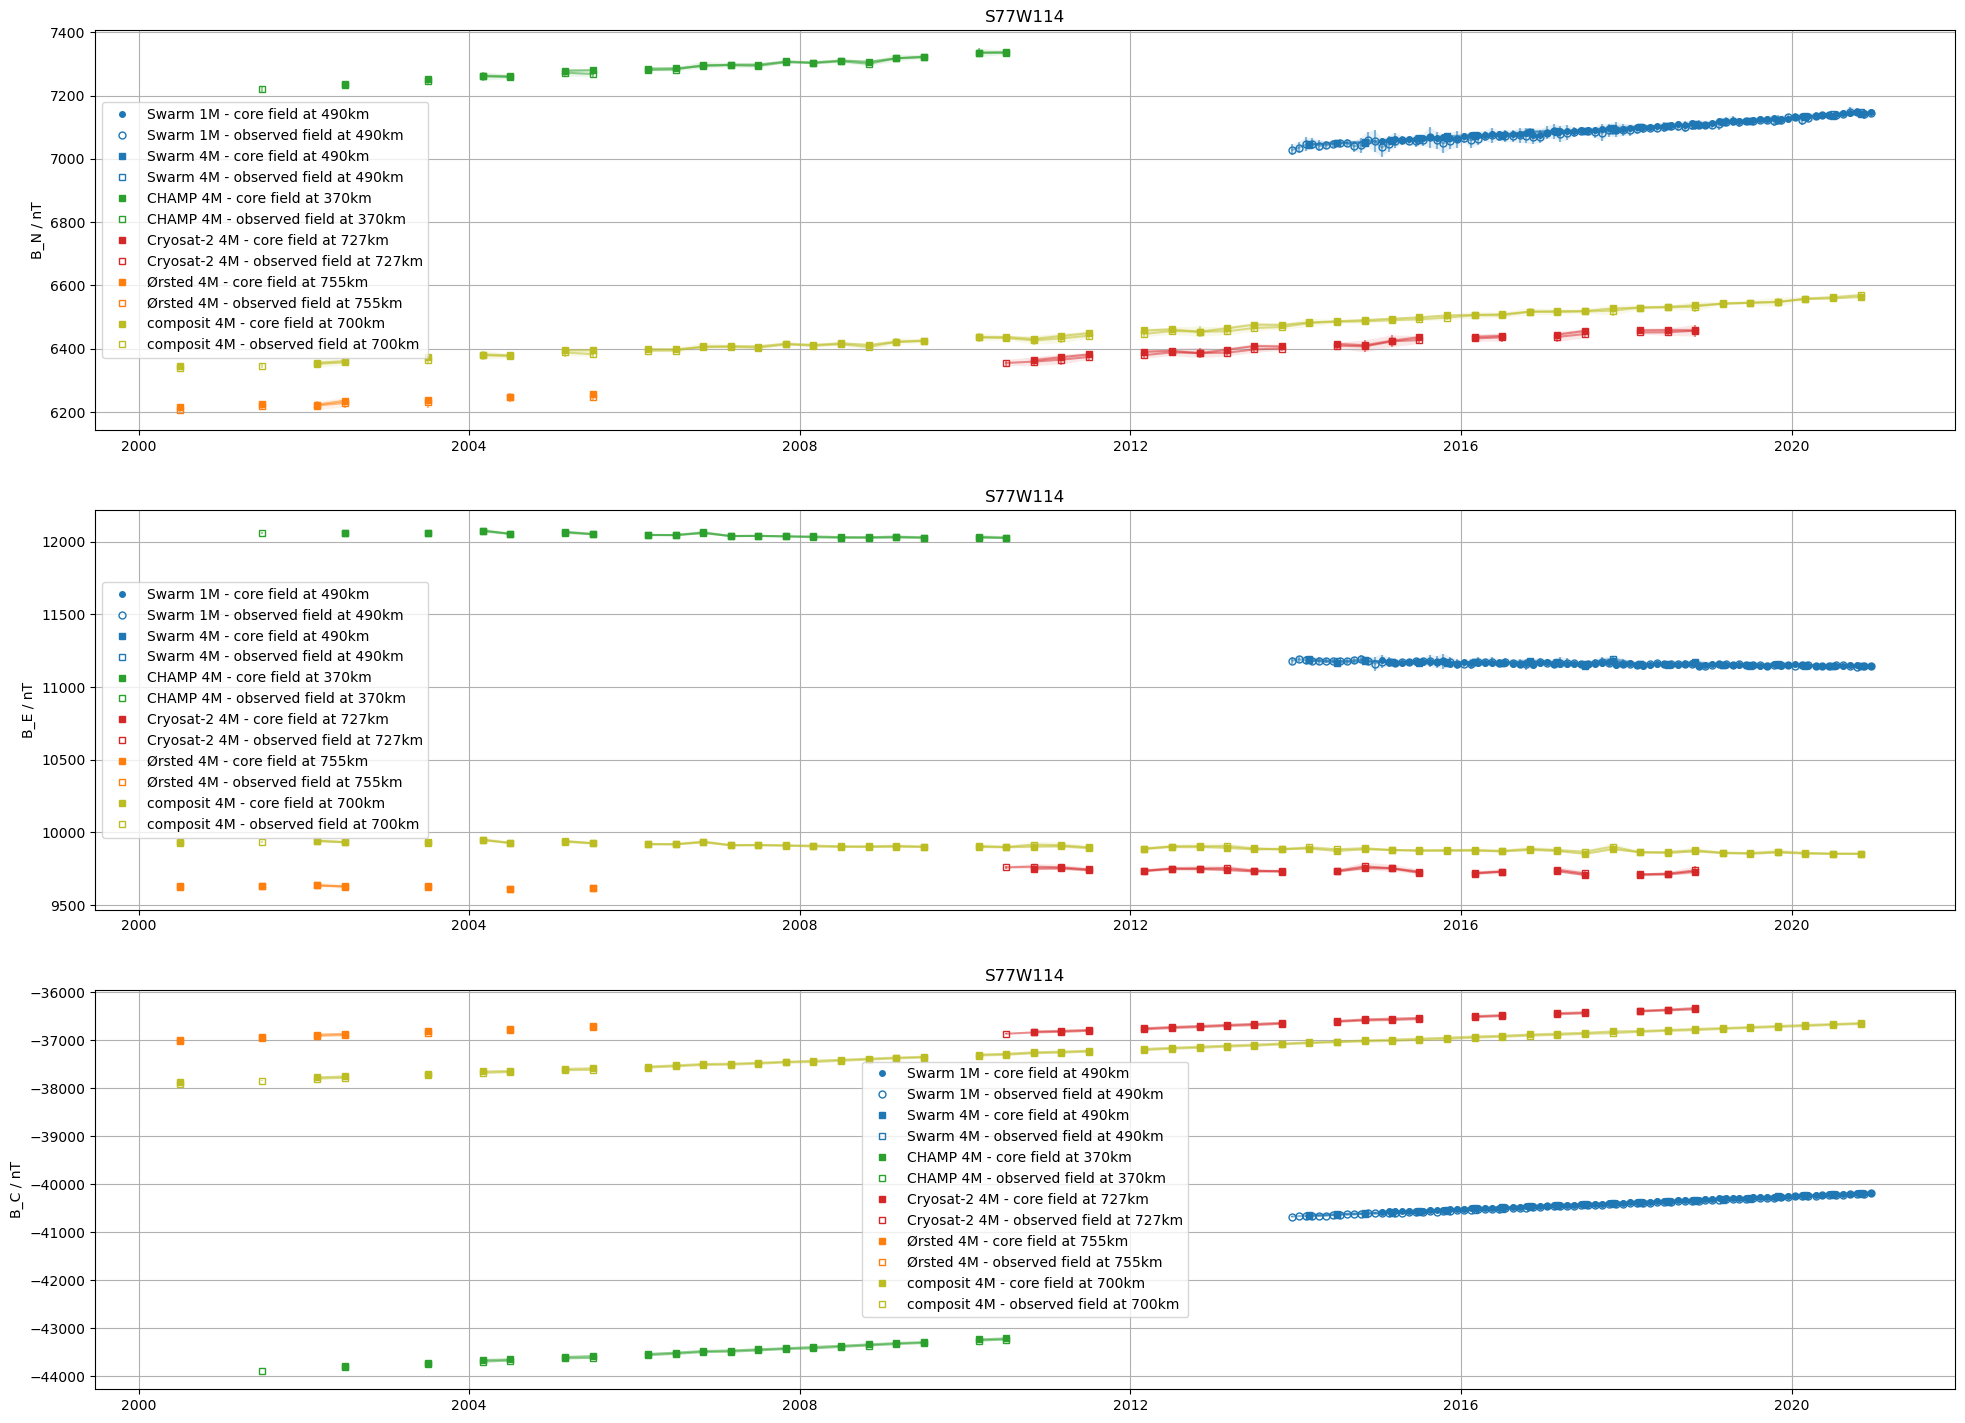

In [3]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    #'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
    'OR_4M': {'mission': 'Ørsted', 'sampling': '4M', 'symbol': 's', 'color': 'tab:orange'},
    'CO_4M': {'mission': 'composit', 'sampling': '4M', 'symbol': 's', 'color': 'tab:olive'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_OB'].values[:, idx], data_['sigma_OB'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.errorbar(data_['Timestamp'].values, data_['B_CF'].values[:, idx], data_['sigma_CF'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_OB'].values[:, idx] - data_['sigma_OB'].values[:, idx],
        data_['B_OB'].values[:, idx] + data_['sigma_OB'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_CF'].values[:, idx] - data_['sigma_CF'].values[:, idx],
        data_['B_CF'].values[:, idx] + data_['sigma_CF'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_CF'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_OB'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=5, mfc='none')[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.extend([
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - core field at {1e-3 * mean_altitude :.0f}km',
        f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - observed field at {1e-3 * mean_altitude :.0f}km'
    ])
ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(plots, labels)
;


''

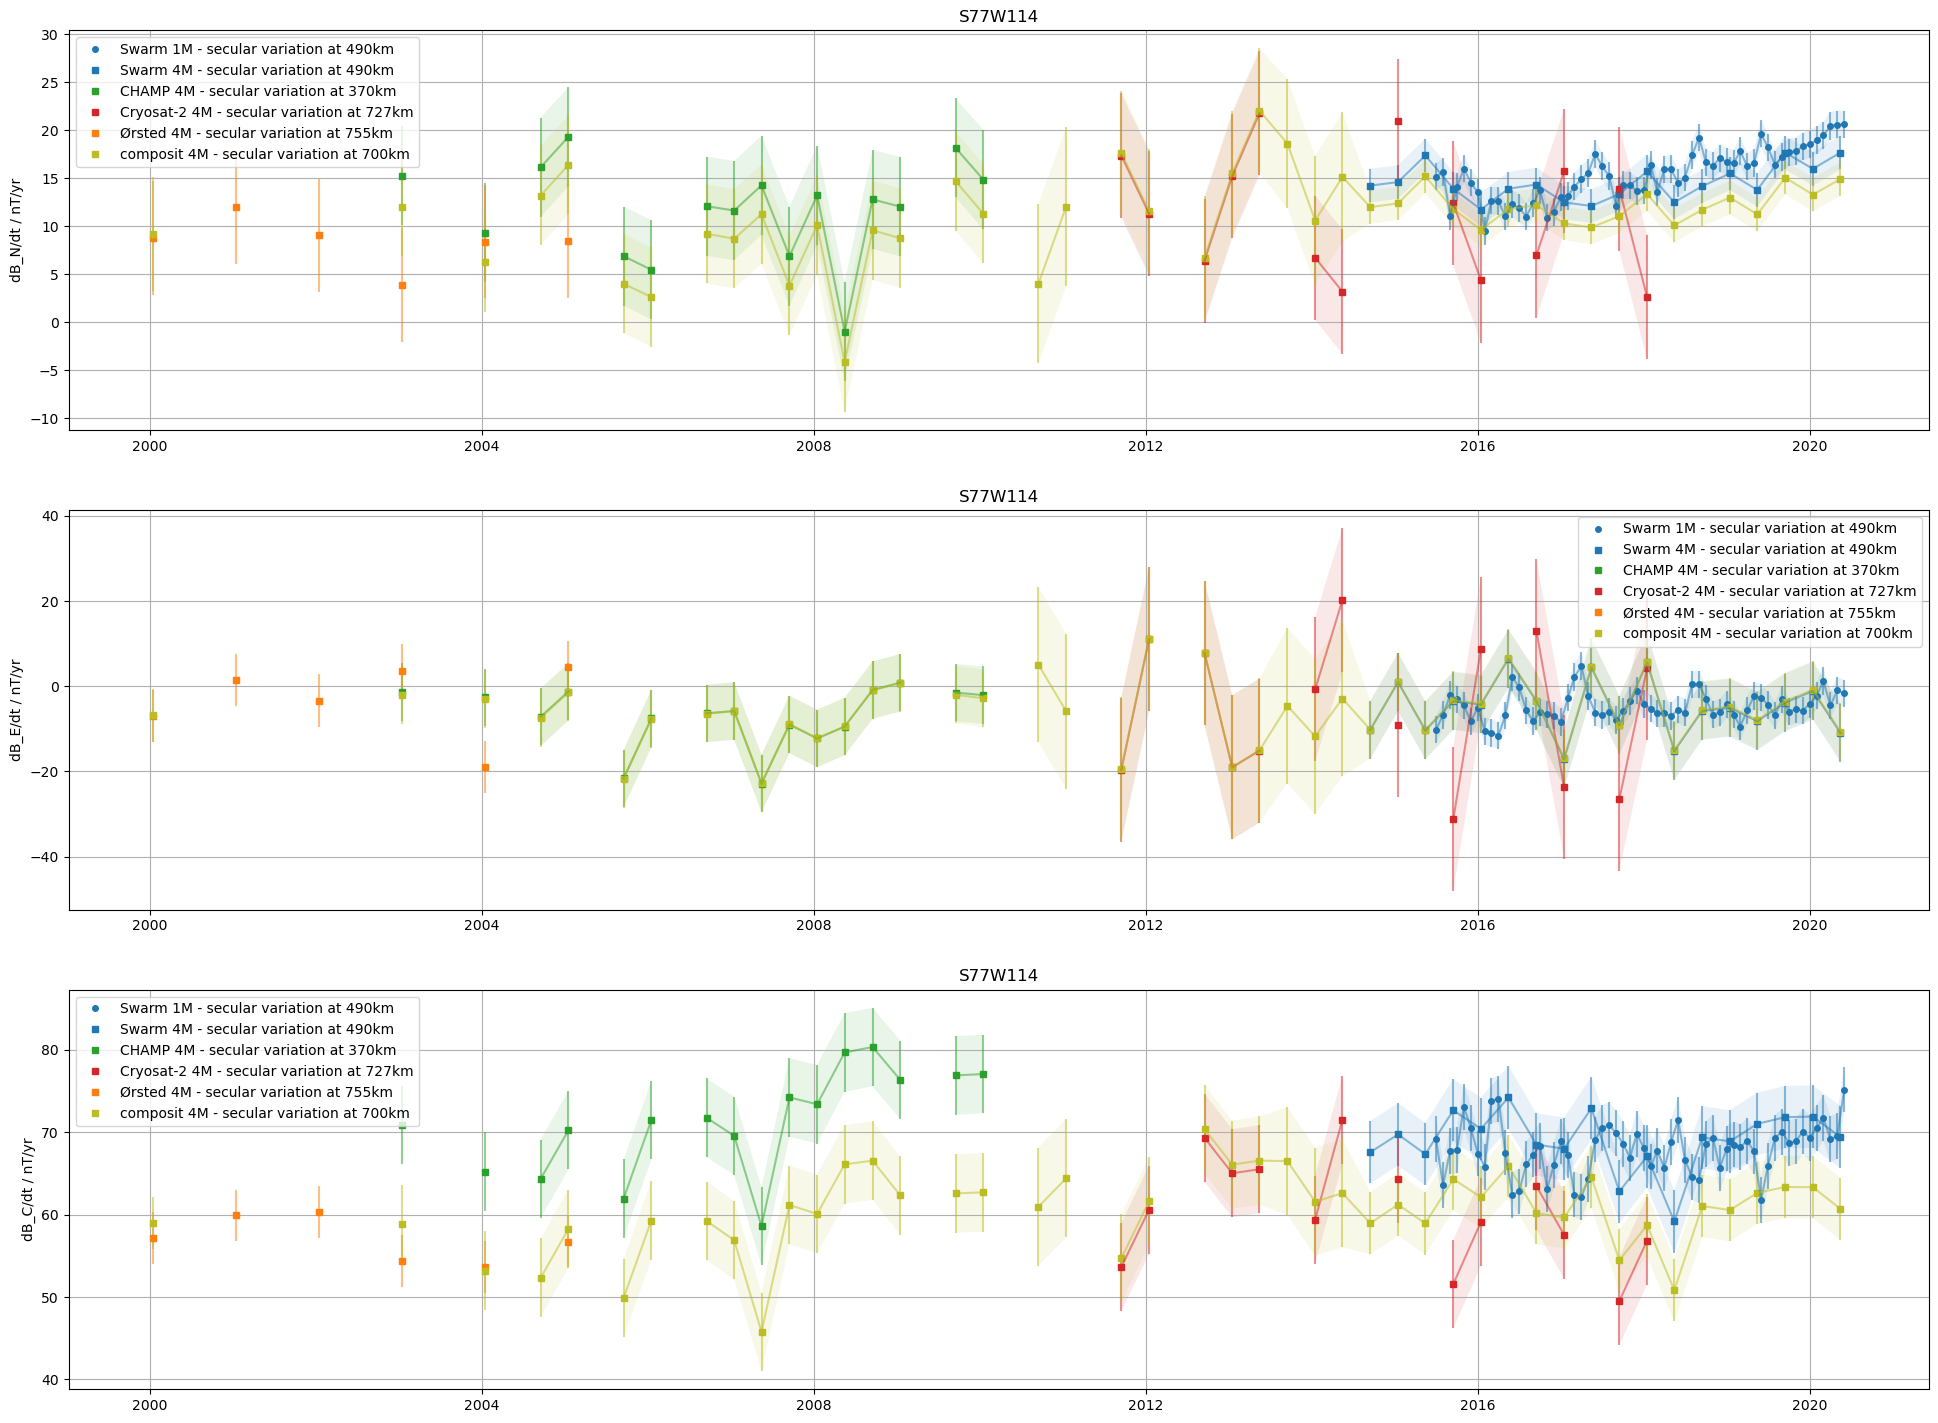

In [4]:
%matplotlib inline
fig = figure(figsize=(24, 18), dpi=100)

meta = {
    'SW_1M': {'mission': 'Swarm', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:blue'},
    'SW_4M': {'mission': 'Swarm', 'sampling': '4M', 'symbol': 's', 'color': 'tab:blue'},
    #'CH_1M': {'mission': 'CHAMP', 'sampling': '1M', 'symbol': 'o', 'color': 'tab:green'},
    'CH_4M': {'mission': 'CHAMP', 'sampling': '4M', 'symbol': 's', 'color': 'tab:green'},
    'CR_4M': {'mission': 'Cryosat-2', 'sampling': '4M', 'symbol': 's', 'color': 'tab:red'},
    'OR_4M': {'mission': 'Ørsted', 'sampling': '4M', 'symbol': 's', 'color': 'tab:orange'},
    'CO_4M': {'mission': 'composit', 'sampling': '4M', 'symbol': 's', 'color': 'tab:olive'},
}

ax = subplot(3, 1, 1)
idx = 0
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')

ax.set_title(site)
ax.set_ylabel('dB_N/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 2)
idx = 1
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')
ax.set_title(site)
ax.set_ylabel('dB_E/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)

ax = subplot(3, 1, 3)
idx = 2
plots, labels = [], []
for type_, data_ in data_sv.items():
    ax.errorbar(data_['Timestamp'].values, data_['B_SV'].values[:, idx], data_['sigma_SV'].values[:, idx], color=meta[type_]['color'], alpha=0.5)
    ax.fill_between(
        data_['Timestamp'].values,
        data_['B_SV'].values[:, idx] - data_['sigma_SV'].values[:, idx],
        data_['B_SV'].values[:, idx] + data_['sigma_SV'].values[:, idx],
        color=meta[type_]['color'], alpha=0.1, ec=None,
    )
for type_, data_ in data_sv.items():
    plots.append(ax.plot(data_['Timestamp'].values, data_['B_SV'].values[:, idx], meta[type_]['symbol'], color=meta[type_]['color'], ms=4)[0])
    mean_altitude = average(data_['Radius'].values) - EARTH_RADIUS
    labels.append(f'{meta[type_]["mission"]} {meta[type_]["sampling"]} - secular variation at {1e-3 * mean_altitude :.0f}km')
ax.set_title(site)
ax.set_ylabel('dB_C/dt / nT/yr')
ax.grid()
ax.legend(plots, labels)
;